<a href="https://colab.research.google.com/github/MaicolFranco/Prediction_Credit_Card/blob/main/Credit_Card_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **About Dataset**
Un gerente del banco está perturbado porque cada vez más clientes abandonan sus servicios de tarjeta de crédito. Realmente apreciarían si uno pudiera predecir para ellos quién será criticado para que puedan acudir de manera proactiva al cliente para brindarles mejores servicios y convertir a los clientes' decisiones en la dirección opuesta.

https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction?resource=download



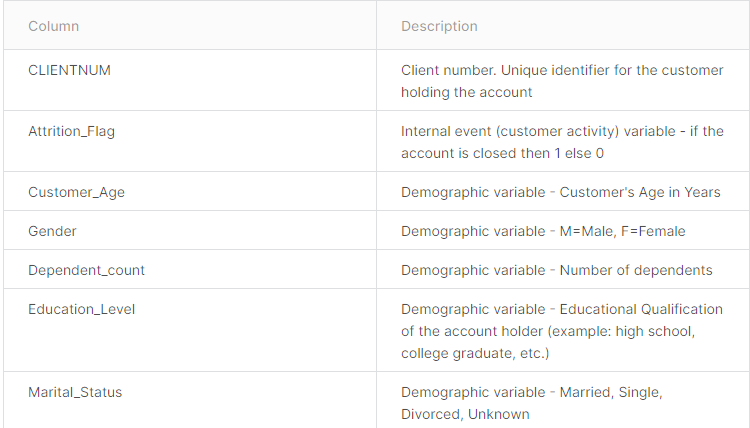 




# **Correspondientes Importaciones**

In [109]:
#importaciones correspondientes
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,)
from xgboost import XGBClassifier
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use("seaborn")

In [110]:
df = pd.read_csv("/content/drive/MyDrive/Data Scientist/MACHINE LEARNING/Week_8/Files/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [112]:
# Comporbar el numero de filas y columnas 
print('Data Shape:', df.shape)

# Comprobar si hay datos duplicados
print('Number of Duplicates:', len(df[df.duplicated()]))

# Comprobar si faltan valores
print('Number of Missing Values:', df.isnull().sum().sum())

Data Shape: (10127, 23)
Number of Duplicates: 0
Number of Missing Values: 0


# `Remarks:`
* Este conjunto de datos incluye 22 características (edad, sexo, salario anual, estado civil, límite de tarjeta de crédito, etc.) de un total de 10 127 clientes bancarios y una variable objetivo (cliente existente frente a cliente perdido) que indica si la cuenta está cerrada o no. 

* Mi principal interés es en el campo del marketing de inteligencia artificial y, a través de este proyecto, quiero descubrir qué acciones suelen preceder a la pérdida de un cliente o una oportunidad de venta, y comprender exactamente qué factores influyen en la retención de clientes.

In [113]:
#Modelo de clasificación
target = df['Attrition_Flag']
target.value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

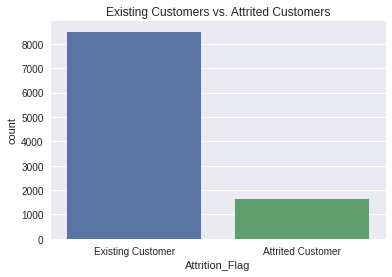

In [114]:
%matplotlib inline
plt.title('Existing Customers vs. Attrited Customers')
sns.countplot(x=target);

El gráfico anterior muestra que la proporción de clientes existentes y perdidos para la columna Attrition_Flag está seriamente desequilibrada. Tendremos que trabajar mucho en ello pronto.

In [115]:
# Eliminar las dos últimas columnas innecesarias
df = df.iloc[:, :-2]


In [116]:
df = df.drop(['CLIENTNUM'], axis=1) 

# **Data Inconsistencies For Categorical Values**

In [117]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [118]:
# Verificar el número de valores únicos para cada columna
for col in df:
    print(col, df[col].nunique())

Attrition_Flag 2
Customer_Age 45
Gender 2
Dependent_count 6
Education_Level 7
Marital_Status 4
Income_Category 6
Card_Category 4
Months_on_book 44
Total_Relationship_Count 6
Months_Inactive_12_mon 7
Contacts_Count_12_mon 7
Credit_Limit 6205
Total_Revolving_Bal 1974
Avg_Open_To_Buy 6813
Total_Amt_Chng_Q4_Q1 1158
Total_Trans_Amt 5033
Total_Trans_Ct 126
Total_Ct_Chng_Q4_Q1 830
Avg_Utilization_Ratio 964


In [119]:
for i in df.loc[:, df.dtypes == object].columns:
    print(i,":",df[i].unique())

Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Gender : ['M' 'F']
Education_Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']


In [120]:
pd.set_option('display.max_columns', None)
df.head(20)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [121]:
check_colums = []
non_numericas = []
def check_numerical_value(col):
    try:
        col_max = df[col].max()
        col_min = df[col].min() 
        if col_min < 0:
            print(f"In the col**** {col}*** there is at leat a value under 0 ******* check!")
            check_colums.append({col +"_min": col_min})
        if col_max > 1:
            print(f"In the col **** {col} **** there is at leat a value over 1 it makes sense? *********** check!")
            check_colums.append({col + "_max": col_max})
        else:
            print(f"the next numerical col seem not to present incosistencies: {col}")
    except:
        non_numericas.append(col)
        print(f"---------column {col} not checked - not numerical col ----------------")

In [122]:
for column in non_numericas:
    print("\n", column, df[column].unique())

# **Manejo de valores faltantes y duplicados**

In [123]:
len(df[df['Education_Level']=='Unknown'])

1519

In [124]:
len(df[df['Marital_Status']=='Unknown'])


749

In [125]:
len(df[df['Income_Category']=='Unknown'])


1112

nivel educativo, el estado civil y la categoría de ingresos no se eliminan porque hay más de 1000 filas marcadas como Desconocido. Si es necesario más adelante, Desconocido se reemplazará con el valor promedio.

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


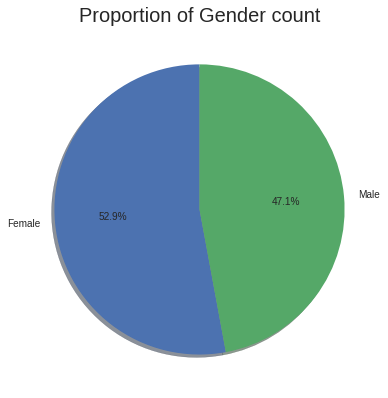

In [127]:
genders = df.Gender.value_counts()
plt.figure(figsize = (6.5,7))
plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'], autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('Proportion of Gender count', fontsize = 20)
plt.show()

# **Ingeneria de caracteristicas**

In [128]:
def engineer(df):
    # promedio de transacción
    df['Avg_Trans_Amt'] = df['Total_Trans_Amt']/df['Total_Trans_Ct']
    
 # Para las funciones categóricas que tienen un orden, codificación ordinal utilizando el mapeo por adelantado

 # (1) Categoría de ingresos ('Menos de $40K' < '$40K - $60K' < '$60K - $80K' < '$80K - $120K' < '$120K +', 'Desconocido' se establece en 0 cómo)
    Income_dict = {'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K' : 3, '$80K - $120K': 4, '$120K +': 5, 'Unknown': 0}
    df["Income_Ordinal"] = df['Income_Category'].map(Income_dict)
    
    # (2) Card Category ('Blue' < 'Silver' < 'Gold' < 'Platinum')
    Card_dict = {'Blue': 1, 'Silver': 2, 'Gold' : 3, 'Platinum': 4}
    df["Card_Ordinal"] = df['Card_Category'].map(Card_dict)
        
    # (3) Education Level ('Uneducated' < 'High School' < 'College' < 'Graduate' < 'Post-Graduate' < 'Doctorate', 'Unknown'은 0으로 대체)
    Educ_dict = {'Uneducated': 1, 'High School': 2, 'College' : 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6, 'Unknown': 0}
    df["Educ_Ordinal"] = df['Education_Level'].map(Educ_dict)
    
    df = df.drop(['Income_Category', 'Card_Category', 'Education_Level'], axis=1)
    df = df.drop('Avg_Open_To_Buy', axis=1)
    
    
    # Conviertir el valor objetivo en un número binario de 0 o 1 para facilitar el modelado futuro (Cliente existente = 0, Cliente retirado = 1)
    df.loc[df.Attrition_Flag == 'Existing Customer', 'Attrition_Flag'] = 0
    df.loc[df.Attrition_Flag == 'Attrited Customer', 'Attrition_Flag'] = 1
    df = df.astype({'Attrition_Flag': np.int64})
    
    return df

df = engineer(df)

In [129]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Trans_Amt,Income_Ordinal,Card_Ordinal,Educ_Ordinal
0,0,45,M,3,Married,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061,27.238095,3,1,2
1,0,49,F,5,Single,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105,39.121212,1,1,4
2,0,51,M,3,Married,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000,94.350000,4,1,4
3,0,40,F,4,Unknown,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,58.550000,1,1,2
4,0,40,M,3,Married,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000,29.142857,3,1,1


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Marital_Status            10127 non-null  object 
 5   Months_on_book            10127 non-null  int64  
 6   Total_Relationship_Count  10127 non-null  int64  
 7   Months_Inactive_12_mon    10127 non-null  int64  
 8   Contacts_Count_12_mon     10127 non-null  int64  
 9   Credit_Limit              10127 non-null  float64
 10  Total_Revolving_Bal       10127 non-null  int64  
 11  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 12  Total_Trans_Amt           10127 non-null  int64  
 13  Total_Trans_Ct            10127 non-null  int64  
 14  Total_

In [131]:
#fig, axes = plt.subplots(1,3, figsize = (14,7))
#axes = axes.ravel()
#continuous_features = df.select_dtypes(['float64']).columns.to_list()
#for cont_feature in enumerate(continuous_features[3:6]):
 #   axes[cont_feature].bar(continuous_features['float64']), continuous_features[col]                             
  #  axes[cont_feature].title({col})
    

In [ ]:
# Continuous Features
continuous_features = df.select_dtypes(['float64']).columns.to_list()

for cont_feature in continuous_features: 
    plt.figure()
    plt.title(cont_feature)
    ax = sns.distplot(df[cont_feature])

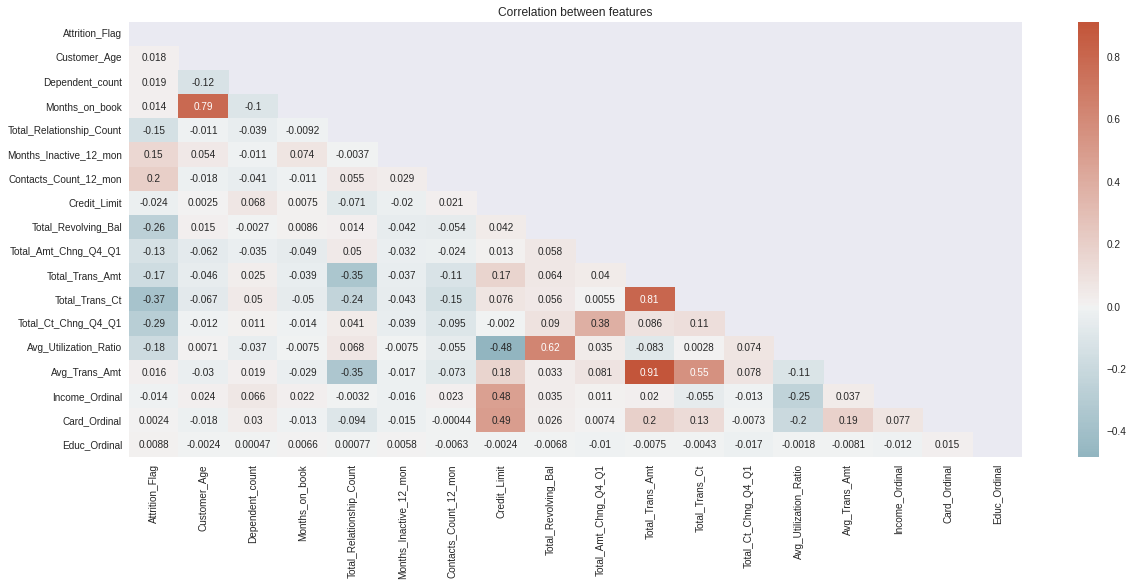

In [133]:
plt.figure(figsize=(20,8))
plt.title("Correlation between features")
mask = np.zeros_like(np.array(df.corr()))
mask[np.triu_indices_from(mask)] = True
sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(df.corr(), cmap=sns.diverging_palette(220, 20, as_cmap=True), mask=mask, annot=True, center = 0);

### **Positivicas Correlaciones:**

* Credit Limit, Avg Open To Buy (1)
* Total Trans Amt, Avg Trans Amt (0.91)
* Total Trans Ct, Total Trans Amt (0.81)
* Months On Book, Customer Age (0.79)
* Avg Utilization Ratio, Total Revolving Bal (0.62)
* Income Ordinal, Credit Limit (0.57)
* Income Ordinal, Avg Open To Buy (0.56)
* Total Trans Ct, Avg Trans Amt (0.55)
* Card Ordinal, Credit Limit (0.49)

### **Negative Correlations:**

* Avg Utilization Ratio, Avg Open To Buy (-0.54)
* Credit Limit, Avg Utilization Ratio (-0.48)
* Total Relationship Count, Total Trans Amount (-0.35)
* Total Relationship Count, Total Avg Amount (-0.35)
* Avg Utilization Ratio, Income Ordinal (-0.33)

In [134]:
#separate features from labels
X = df.drop(['Attrition_Flag'],axis=1)
y = df['Attrition_Flag']

# **Modelos**

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [136]:
#Creación de datos codificados con One_Hot
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

# **DecisionTree**

In [137]:
Model_tree = DecisionTreeClassifier( random_state=1)
Model_tree.fit(X_train, y_train)
tre_pred = Model_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, tre_pred)
print("Accuracy:"+str(accuracy_dt))

Accuracy:0.9430733794011188


# **RandomForest**

In [138]:
Model_random = RandomForestClassifier(random_state=1)
Model_random.fit(X_train,y_train)
Model_pred = Model_random.predict(X_test)
accuracy_rfr = accuracy_score(y_test, Model_pred)
print("Accuracy:"+str(accuracy_rfr))


Accuracy:0.9677525501809806


# **XGB**

In [139]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)
xgbPreds = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, xgbPreds)
print("Accuracy:"+str(accuracy_xgb))

Accuracy:0.9667653833497861


Estas variables son un poco más complicadas de interpretar debido a la diferencia entre las unidades de medida.

Podemos ver que el 'Total_Trans_Ct' tiene un impacto positivo en la permanencia del cliente y este impacto parece ser bastante significativo. Esta función mide el número total de transacciones realizadas durante los últimos 12 meses. Entonces, esto significa que los clientes que realizan más transacciones durante los últimos 12 meses son más propensos a quedarse, lo que tiene sentido.
También podemos ver que el 'Total_Trans_Amt' tiene un impacto negativo significativo en la decisión de quedarse del cliente. Esta característica es el monto total de la transacción durante los últimos 12 meses. En cierto modo esto también tiene sentido porque cuando un cliente se da de baja el banco va a sacar todos sus ahorros.
También podemos ver en 'Total_Revolving_Bal' que un cliente con departamentos más altos es más propenso a quedarse.
Con la función 'Total_Relationship_Count' podemos ver que cuantos más productos contrata un cliente, más propenso es a quedarse.
Con la función 'Total_Ct_Chng_Q4_Q1' podemos ver que cuanto más gastaron en el Q4 con respecto al Q1, más propensos son a quedarse.
Con la función 'Contacts_Count_12_mon' podemos ver que cuanto más contacta el cliente con el banco, más propenso es a hacerlo.
Con la función 'Months_Inactive_12_mon' podemos ver que cuanto más inactivo es el cliente, más propenso es a abandonar la empresa.